<a href="https://colab.research.google.com/github/netoquimico/Pythonworks/blob/main/Classification%20study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive

In [5]:
classification=pd.read_csv('/content/classification.csv')

## **Data base**

In [7]:
classification.head(100)

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0
...,...,...,...
95,35.654672,32.405700,1.0
96,19.014690,59.619863,1.0
97,25.729217,65.312017,1.0
98,8.796110,17.290697,0.0


In [8]:
classification.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [10]:
classification.isnull().sum()

age         0
interest    0
success     0
dtype: int64

## **Predictors and class split**

In [11]:
X_classification=classification.iloc[:,0:2].values

In [12]:
Y_classification=classification.iloc[:,2].values

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_classification = StandardScaler()
X_classification = scaler_classification.fit_transform(X_classification)

In [14]:
X_classification

array([[-5.86700143e-03, -1.28318031e+00],
       [-1.28373914e-01, -1.32381516e+00],
       [ 9.99394422e-01, -7.99421212e-01],
       [-1.92016715e+00, -9.70912081e-01],
       [-1.05183995e+00, -1.37848654e+00],
       [-7.06493983e-01, -1.15063604e+00],
       [-4.16060782e-01,  1.20750886e+00],
       [ 7.44193933e-01,  7.26048536e-01],
       [-9.69677678e-01, -6.65338227e-01],
       [ 7.31121255e-01,  5.47274874e-01],
       [ 4.86693117e-01,  7.72888241e-01],
       [-7.81763956e-01, -2.12218050e-01],
       [-1.48332333e+00, -1.24853755e+00],
       [ 3.30512774e-01,  2.05204586e+00],
       [ 2.83436787e-01, -4.82960652e-01],
       [-6.80334215e-01,  6.30099891e-01],
       [ 1.06929043e+00,  9.01767377e-01],
       [ 9.51903573e-03, -1.11369170e+00],
       [ 1.59731753e+00, -4.86595308e-01],
       [ 1.29410695e+00, -6.30607716e-01],
       [ 6.40878573e-01, -9.90150342e-01],
       [ 8.98311543e-01,  1.19298179e+00],
       [-1.48476447e-01,  2.25981205e+00],
       [ 2.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_classification_training, x_classification_test, y_classification_training, y_classification_test = train_test_split(X_classification, Y_classification, test_size = 0.2, random_state = 0)

In [17]:
import pickle

In [19]:
with open('classification.pkl', mode = 'wb') as f:
  pickle.dump([x_classification_training, y_classification_training, x_classification_test, y_classification_test], f)

## **Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
classification_data = GaussianNB()
classification_data.fit(x_classification_training, y_classification_training)

GaussianNB()

In [24]:
prediction = classification_data.predict(x_classification_test)

In [25]:
prediction

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 0.])

In [26]:
y_classification_test

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0.])

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
accuracy_score(y_classification_test, prediction)

0.9

In [29]:
from yellowbrick.classifier import ConfusionMatrix

0.9

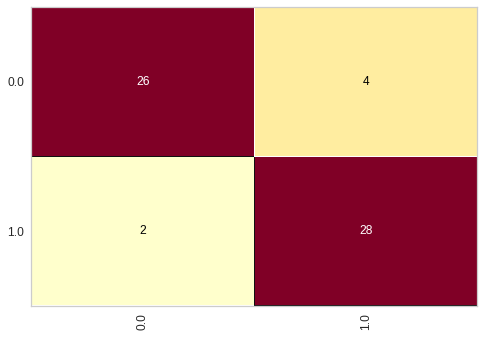

In [30]:
cm = ConfusionMatrix(classification_data)
cm.fit(x_classification_training, y_classification_training)
cm.score(x_classification_test, y_classification_test)

In [31]:
print(classification_report(y_classification_test, prediction))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90        30
         1.0       0.88      0.93      0.90        30

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



## **Neural Networks**

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
from sklearn import neural_network
neural_network = MLPClassifier(max_iter=4000, verbose=True, tol=0.00000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))

In [35]:
neural_network.fit(x_classification_training, y_classification_training)

Iteration 1, loss = 0.71685783
Iteration 2, loss = 0.71010575
Iteration 3, loss = 0.70388068
Iteration 4, loss = 0.69762905
Iteration 5, loss = 0.69146200
Iteration 6, loss = 0.68519616
Iteration 7, loss = 0.67911757
Iteration 8, loss = 0.67298204
Iteration 9, loss = 0.66669280
Iteration 10, loss = 0.66063424
Iteration 11, loss = 0.65443639
Iteration 12, loss = 0.64824719
Iteration 13, loss = 0.64195843
Iteration 14, loss = 0.63567691
Iteration 15, loss = 0.62914620
Iteration 16, loss = 0.62264852
Iteration 17, loss = 0.61616720
Iteration 18, loss = 0.60953577
Iteration 19, loss = 0.60298223
Iteration 20, loss = 0.59622347
Iteration 21, loss = 0.58951423
Iteration 22, loss = 0.58263735
Iteration 23, loss = 0.57583549
Iteration 24, loss = 0.56898824
Iteration 25, loss = 0.56184444
Iteration 26, loss = 0.55510192
Iteration 27, loss = 0.54792502
Iteration 28, loss = 0.54104351
Iteration 29, loss = 0.53389716
Iteration 30, loss = 0.52688964
Iteration 31, loss = 0.51991702
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=4000, tol=1e-06,
              verbose=True)

In [37]:
prediction = neural_network.predict(x_classification_test)

In [38]:
prediction

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0.])

In [39]:
y_classification_test

array([1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0.])

In [40]:
accuracy_score(y_classification_test, prediction)

0.9333333333333333

0.9333333333333333

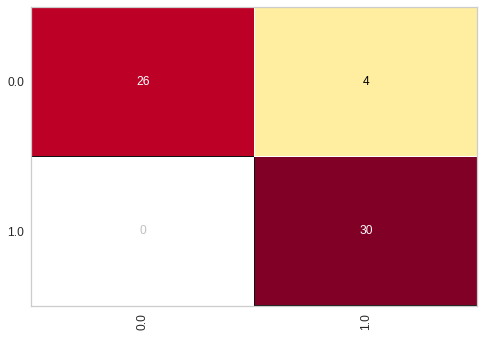

In [41]:
cm = ConfusionMatrix(neural_network)
cm.fit(x_classification_training, y_classification_training)
cm.score(x_classification_test, y_classification_test)